# Name: Junaid Salman
# CID: DEP1353

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import joblib

In [4]:
import pandas as pd
df = pd.read_csv('emails.csv')

## Data Cleaning and Preprocessing

In [5]:
# Top 5 Entries of the Dataset
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Number of Columns present within the dataset along with rows
print(df['Prediction'].value_counts())

0    3672
1    1500
Name: Prediction, dtype: int64


In [7]:
# Get the number of columns and rows in the DataFrame
num_columns = df.shape[1]
num_rows = df.shape[0]

# Print the number of columns and rows
print(f"Number of columns: {num_columns}")
print(f"Number of rows: {num_rows}")

Number of columns: 3002
Number of rows: 5172


In [8]:
# Number of Null Values in the Dataset
print(f"There are {df.isna().sum().sum()} null values in the dataset.")

There are 0 null values in the dataset.


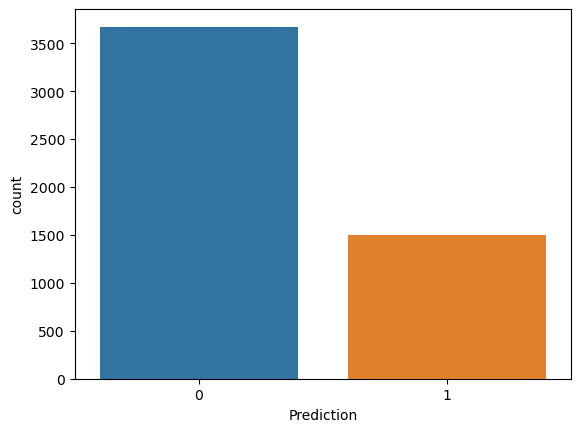

In [13]:
import seaborn as sns
sns.countplot(data = df, x = "Prediction")
plt.show()

In [9]:
df = df.drop(columns=['Email No.'])

In [10]:
X = df.iloc[:, :3000]
y = df.iloc[:, -1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

## Model Selection and Training

Naïve Bayes Accuracy: 0.9523195876288659


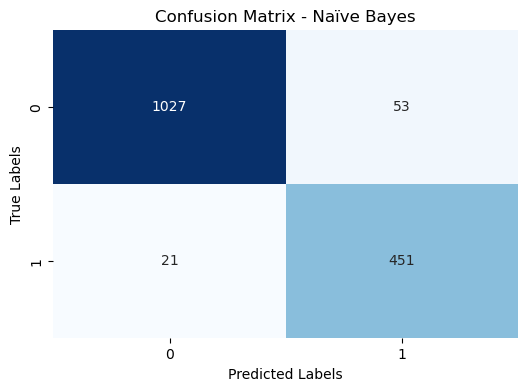

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# 1. Naïve Bayes model
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_predictions = NB.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naïve Bayes Accuracy: {nb_accuracy}")

# Confusion Matrix for Naïve Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naïve Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

SVM Accuracy: 0.9600515463917526


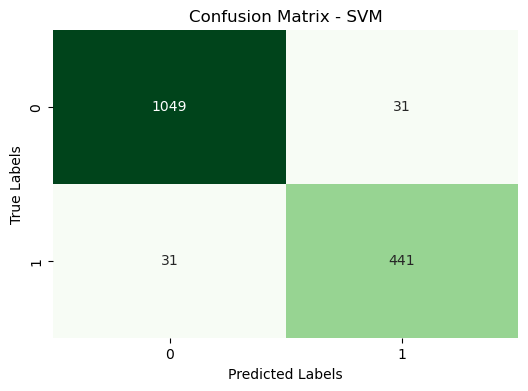

In [15]:
# 2. SVM model
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)
svm_predictions = SVM.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Model Fine-Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=8), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model found
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

# Calculate accuracy
best_accuracy = accuracy_score(y_test, best_predictions)
print(f"Best SVM Accuracy: {best_accuracy}")

# Confusion Matrix for best model
best_cm = confusion_matrix(y_test, best_predictions)
print("Confusion Matrix - Best SVM:")
print(best_cm)

# Classification Report for best model (optional)
best_classification_report = classification_report(y_test, best_predictions)
print("Classification Report - Best SVM:")
print(best_classification_report)
